# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Valor_Aluguel     7203 non-null   int64
 1   Valor_Condominio  7203 non-null   int64
 2   Metragem          7203 non-null   int64
 3   N_Quartos         7203 non-null   int64
 4   N_banheiros       7203 non-null   int64
 5   N_Suites          7203 non-null   int64
 6   N_Vagas           7203 non-null   int64
dtypes: int64(7)
memory usage: 394.0 KB


O DataFrame possui 7.203 registros e 7 colunas, todas compostas por números inteiros (int64). Não há dados faltantes, o que indica uma base consistente e pronta para análises estatísticas e modelagens preditivas sem necessidade de tratamento inicial de valores ausentes.

# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

In [8]:
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


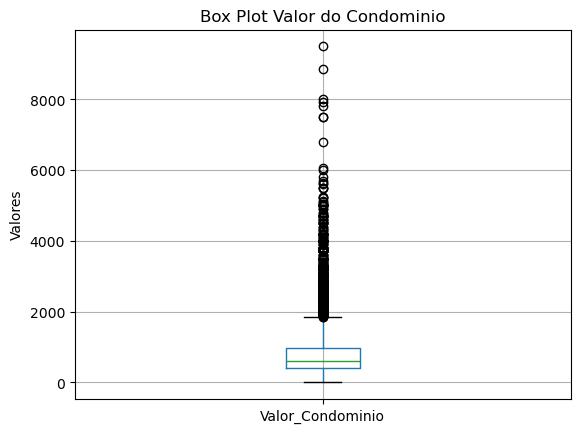

In [9]:
df.boxplot(column='Valor_Condominio')
plt.title('Box Plot Valor do Condominio')
plt.ylabel('Valores')
plt.show()

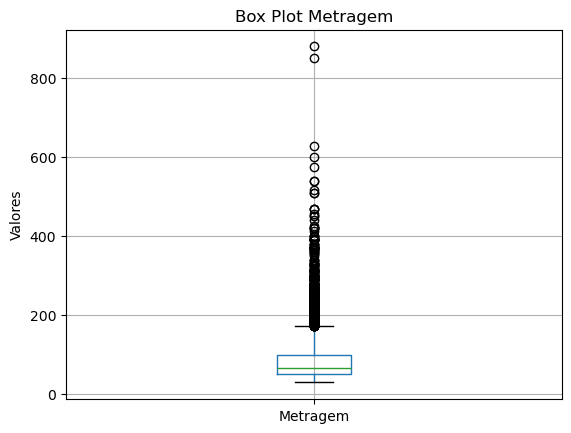

In [10]:
df.boxplot(column='Metragem')
plt.title('Box Plot Metragem')
plt.ylabel('Valores')
plt.show()

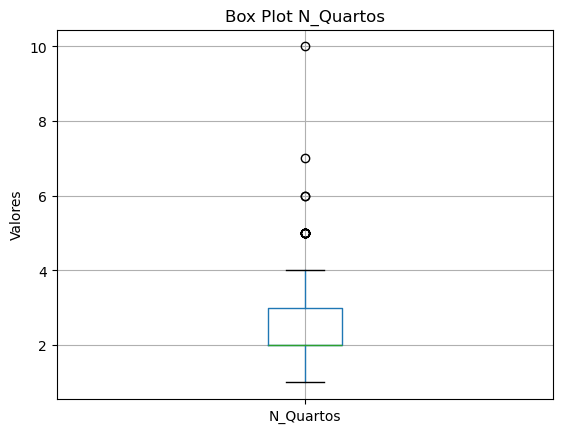

In [11]:
df.boxplot(column='N_Quartos')
plt.title('Box Plot N_Quartos')
plt.ylabel('Valores')
plt.show()

In [12]:
df[df['Valor_Condominio'] > 4000]


,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
3604,2000,4700,400,4,5,4,4
3845,2000,5000,280,4,5,4,4
4893,2800,6059,66,2,2,1,1
5096,3000,7500,393,4,6,4,6
5490,3500,4700,325,4,3,1,4
...,...,...,...,...,...,...,...
7194,25000,4500,306,3,4,3,5
7197,25000,5636,327,4,3,2,3
7198,25000,7500,627,4,5,4,6
7199,25000,4600,364,4,2,1,0


In [13]:
porcentagem = (len(df[df['Valor_Condominio'] > 4000]) / len(df)) * 100
print("Porcentagem de registros onde 'Valor_Condominio' > 4000:", round(porcentagem, 2), "%")


Porcentagem de registros onde 'Valor_Condominio' > 4000: 1.0 %


A porcentagem dos valores que são possiveis Outleiers é muito baixa em relação a base e os dados podem ser importantes para o modelo, depois de analisar cada coluna resolvi não fazer o tratamento dos quartis

<h3>O valor do condomínio influencia o valor do aluguel?</h3>

No Grafico podemos ver que quanto mais caro o condominio mais caro é o aluguel.

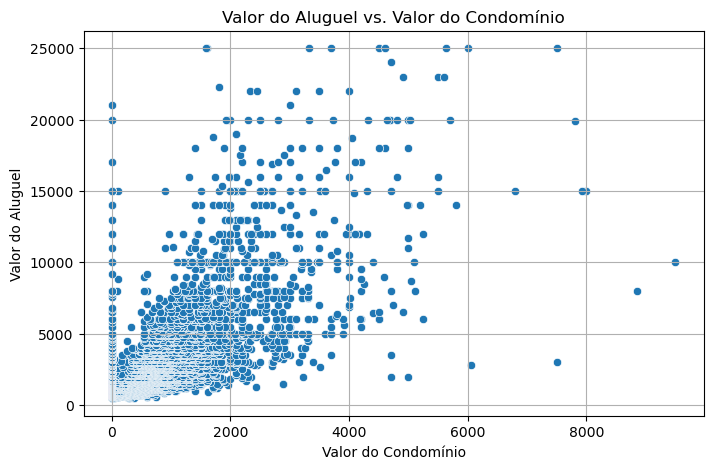

Correlação entre condomínio e aluguel: 0.70


In [14]:

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Valor_Condominio', y='Valor_Aluguel')
plt.title('Valor do Aluguel vs. Valor do Condomínio')
plt.xlabel('Valor do Condomínio')
plt.ylabel('Valor do Aluguel')
plt.grid(True)
plt.show()

# Correlação
correlacao = df['Valor_Condominio'].corr(df['Valor_Aluguel'])
print(f"Correlação entre condomínio e aluguel: {correlacao:.2f}")


<h3>Imóveis com mais quartos tendem a ter aluguel mais alto?</h3>

Sim mas não parece ser determinante para o valor final do aluguel.

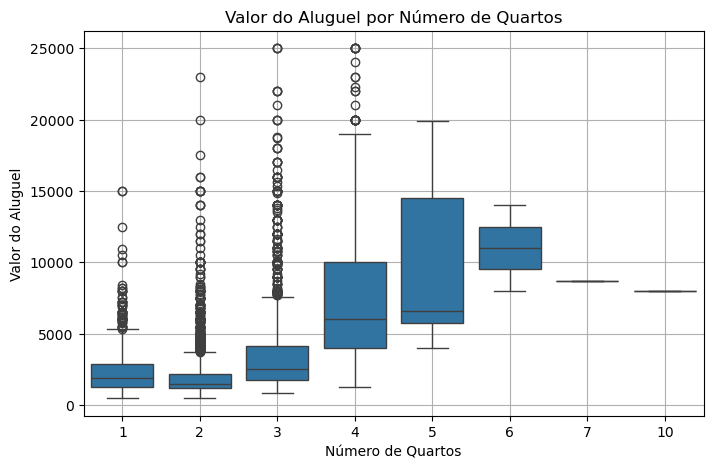

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='N_Quartos', y='Valor_Aluguel')
plt.title('Valor do Aluguel por Número de Quartos')
plt.xlabel('Número de Quartos')
plt.ylabel('Valor do Aluguel')
plt.grid(True)
plt.show()


<h3>A metragem do imóvel tem correlação com o valor do aluguel?</h3>

Sim, quanto maior, mais caro o imóvel.

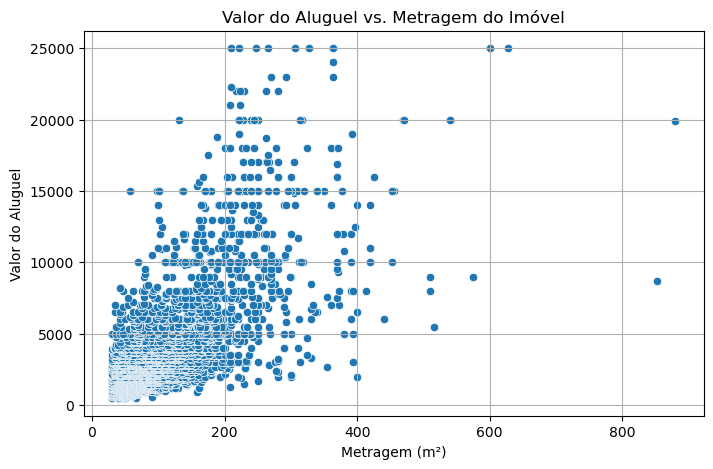

Correlação entre metragem e aluguel: 0.73


In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Metragem', y='Valor_Aluguel')
plt.title('Valor do Aluguel vs. Metragem do Imóvel')
plt.xlabel('Metragem (m²)')
plt.ylabel('Valor do Aluguel')
plt.grid(True)
plt.show()

# Correlação
correlacao_metragem = df['Metragem'].corr(df['Valor_Aluguel'])
print(f"Correlação entre metragem e aluguel: {correlacao_metragem:.2f}")


# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




In [17]:
import sklearn

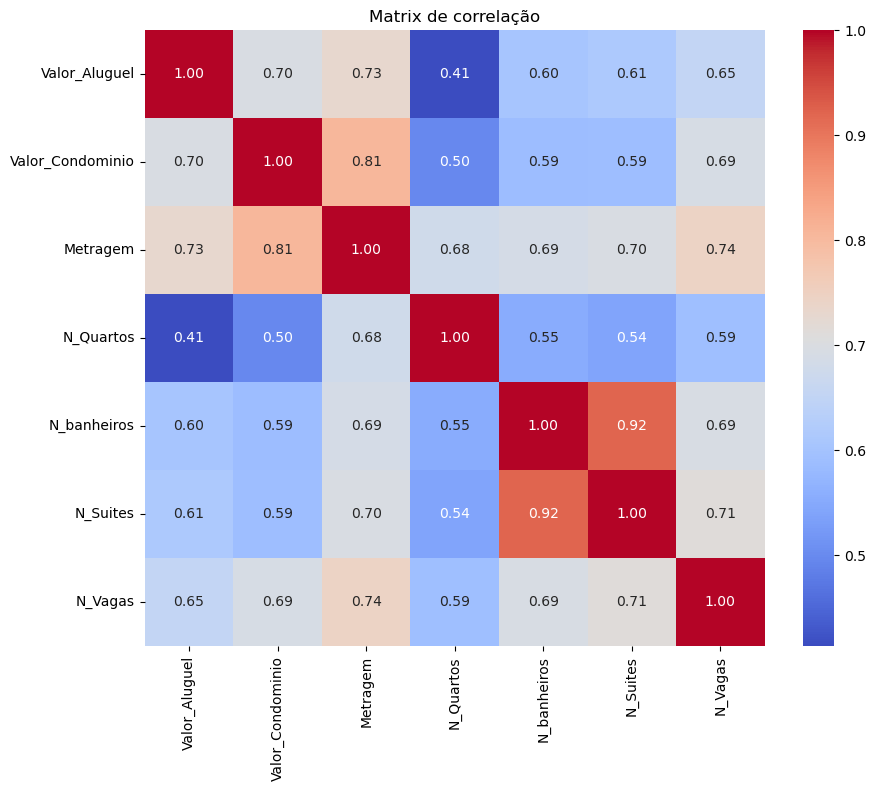

In [18]:
correlação_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize= (10,8))
sns.heatmap(correlação_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size":10})
plt.title('Matrix de correlação')
plt.show()

E mais uma vez vemos o valor de condominio e o de metragem serem as categorias com maiores correlações.


B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [19]:
X = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#O parametro random_state é usada para garantir que possa reproduzir novamente o modelo

In [22]:
X_train

,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
6931,1350,176,3,4,3,3
4125,680,70,1,1,0,2
6079,650,66,2,1,0,1
5044,655,68,3,2,1,1
2299,330,33,1,1,0,1
...,...,...,...,...,...,...
3772,450,48,2,2,1,1
5191,570,34,1,1,0,1
5226,976,95,2,2,1,1
5390,550,74,3,3,1,2


In [23]:
X_test

,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
3885,484,50,2,1,0,1
4661,680,50,2,1,0,1
1038,0,58,2,2,1,1
5867,1226,127,3,1,0,2
5099,697,90,4,3,1,2
...,...,...,...,...,...,...
4689,1250,160,3,3,1,2
5313,530,43,1,2,1,1
5624,1250,147,4,4,2,3
4647,650,53,2,1,0,1


In [24]:
y_train

6931    10000
4125     2200
6079     4500
5044     2900
2299     1500
        ...  
3772     2000
5191     3000
5226     3000
5390     3200
860      1100
Name: Valor_Aluguel, Length: 5402, dtype: int64

In [25]:
y_test

3885    2100
4661    2500
1038    1200
5867    4000
5099    3000
        ... 
4689    2550
5313    3100
5624    3500
4647    2500
4453    2500
Name: Valor_Aluguel, Length: 1801, dtype: int64

# 4 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [26]:
X = X_train[['Metragem']]  # Variável independente (características)
y = y_train  # Variável dependente (rótulo)
# se você deu um nome diferente para x train e y train, altere no código.

In [27]:
regressao_valor_aluguel= LinearRegression()
regressao_valor_aluguel.fit(X,y)

LinearRegression()

B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [28]:
regressao_valor_aluguel.intercept_

-103.17820863080124

In [29]:
regressao_valor_aluguel.coef_

array([34.70818769])

Nossa equação seria: *Valor_Aluguel* = -103.17*(Metragem) + 34.70

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [30]:
regressao_valor_aluguel.score(X,y)

0.5213271756253639

O R² é baixo por volta de 52% isso nos diz que não teremos uma reta bem definida o que pode trazer previsões não tão exatas.

D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

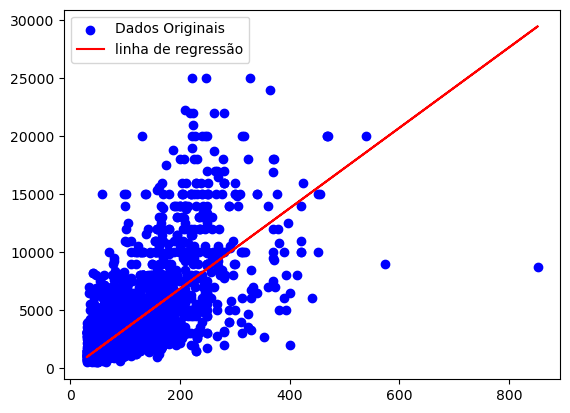

In [31]:
plt.scatter(X, y, color='blue', label= 'Dados Originais')

plt.plot(X, regressao_valor_aluguel.predict(X), color = 'red', label= 'linha de regressão')
plt.legend()
plt.show()

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [32]:
X_test = X_test[['Metragem']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

In [33]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = regressao_valor_aluguel.predict(X_test)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = regressao_valor_aluguel.score(X_test, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)


Coeficiente de Determinação (R²) nos Dados de Teste: 0.5651600449476675


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

Ao rodar o test encontramos um R² maior que o de teste mas ainda não tão distante, isso nos mostra que o modelo acertou os testes e esta funcionando bem.

# 5 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [38]:
X = X_train[['Valor_Condominio', 'Metragem',	'N_Quartos', 'N_banheiros',	'N_Suites',	'N_Vagas']] # Variável independente (características)
y = y_train 


B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [39]:
regressao_multipla = LinearRegression()
regressao_multipla.fit(X,y)

LinearRegression()

C) Traga o valor do R quadrado e avalie o valor encontrado.

In [40]:
regressao_multipla.score(X,y)

0.5971610197647366

D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [44]:
X_test_multiplo = X_test # Variável independente (características)
y_test_multiplo = y_test  # Variável dependente (rótulo)

In [45]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = regressao_valor_aluguel.predict(X_test_multiplo)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = regressao_valor_aluguel.score(X_test_multiplo, y_test_multiplo)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)

Coeficiente de Determinação (R²) nos Dados de Teste: 0.5651600449476675


E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

Com base na análise dos modelos, a Regressão Simples apresentou melhor desempenho em comparação à Regressão Múltipla. O coeficiente de determinação (R²) do modelo de Regressão Múltipla foi inferior ao R² obtido na etapa de treino, o que indica um possível overfitting ou um ajuste inadequado aos dados de teste. Esse comportamento sugere que o modelo não generaliza bem para novos dados. Já o modelo de Regressão Simples demonstrou maior consistência e melhor capacidade de explicação da variável dependente. Diante disso, a Regressão Simples é a escolha mais adequada neste momento.